In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [16]:
df = pd.read_csv(r"C:\Users\VICTUS\Downloads\KNN\KNN\Zoo.csv")

In [17]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [18]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [19]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [43]:
df.drop(columns=['animal name'],inplace=True)

In [48]:
df.nunique()

hair        2
feathers    2
eggs        2
milk        2
airborne    2
aquatic     2
predator    2
toothed     2
backbone    2
breathes    2
venomous    2
fins        2
legs        6
tail        2
domestic    2
catsize     2
type        7
dtype: int64

# Visualizaton

# Count Plot

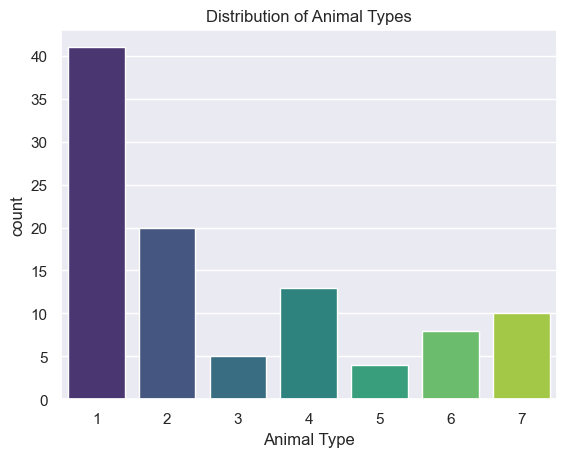

In [42]:
sns.set_theme(style='darkgrid')
sns.countplot(x = df['type'],palette='viridis')
plt.xlabel('Animal Type')
plt.title('Distribution of Animal Types')
plt.show()

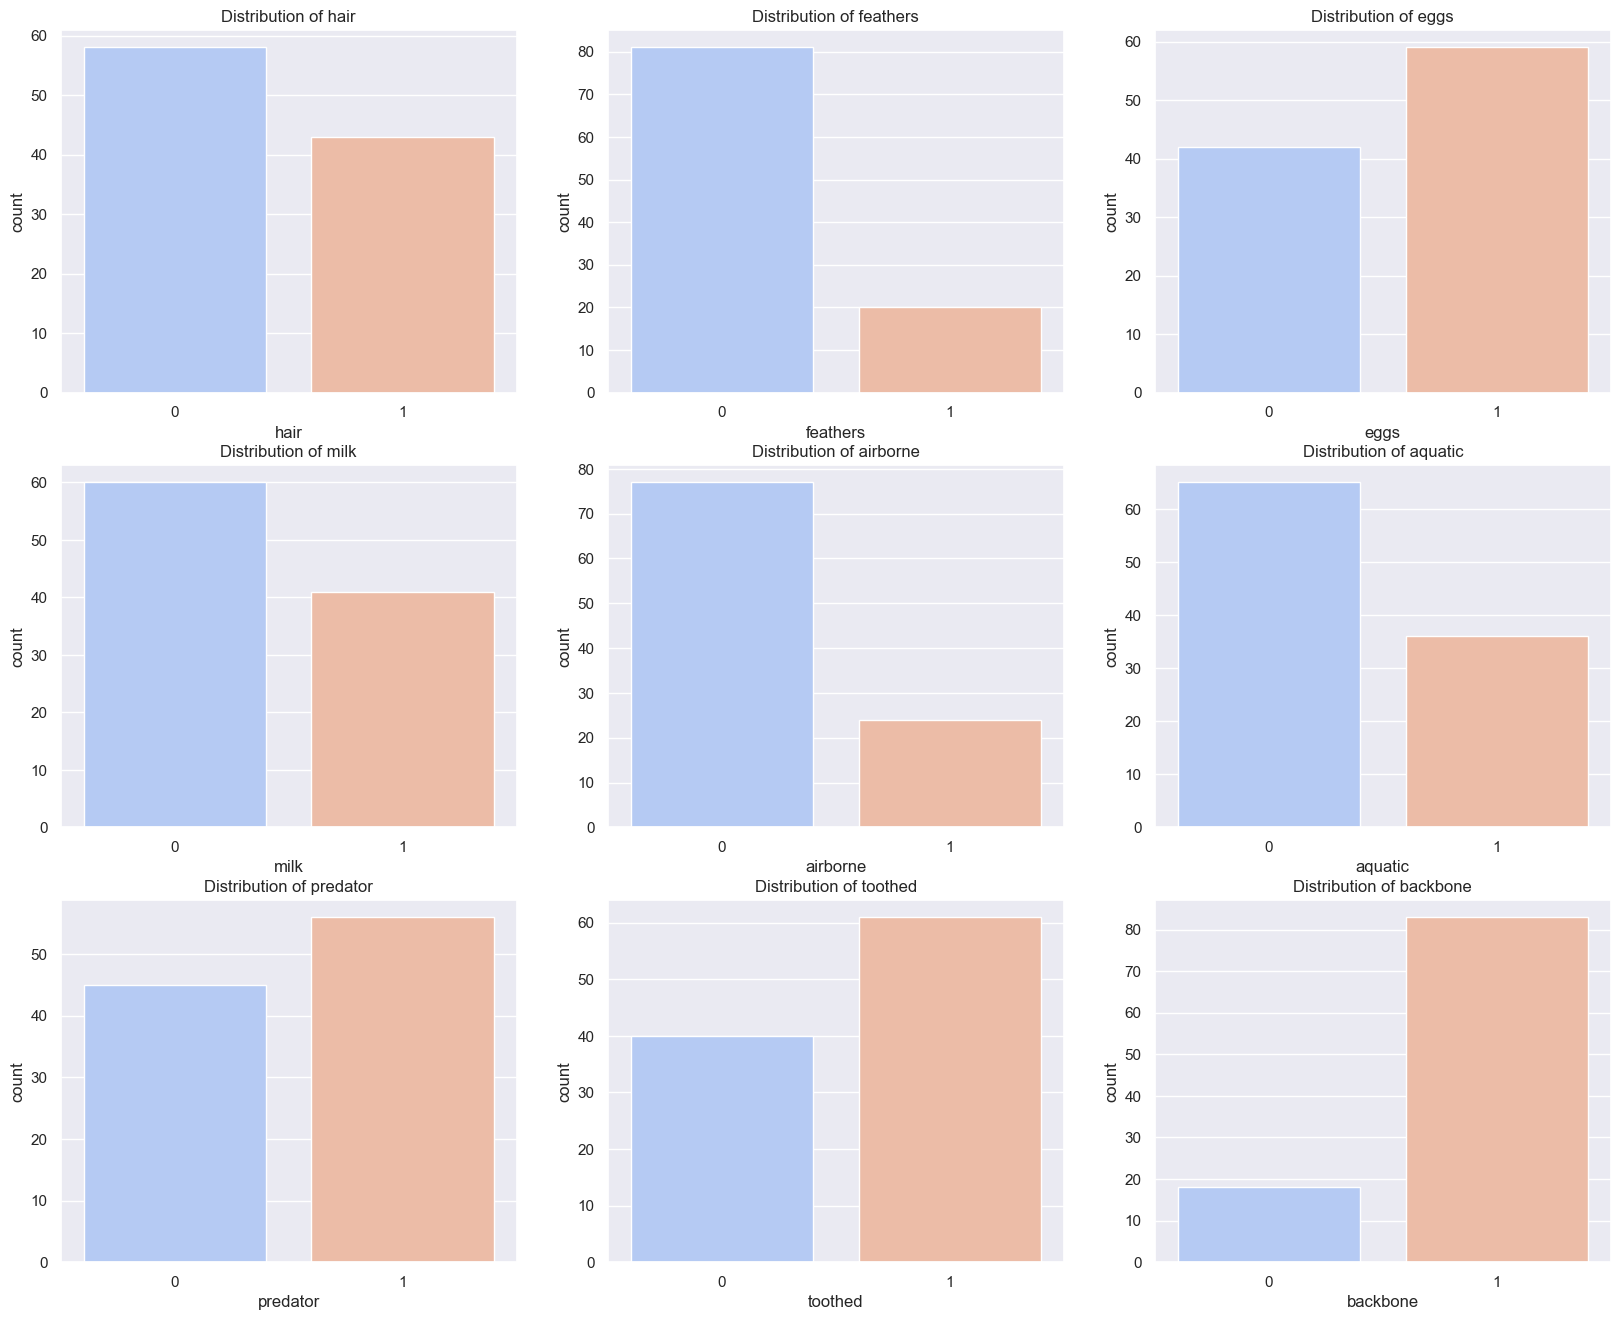

In [40]:
plt.figure(figsize=(20,16))
Cat_cols = ['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone']
for i,column in enumerate( Cat_cols,1):
    plt.subplot(3,3,i)
    sns.countplot(x = column, data = df,palette='coolwarm')
    plt.title(f'Distribution of {column}')

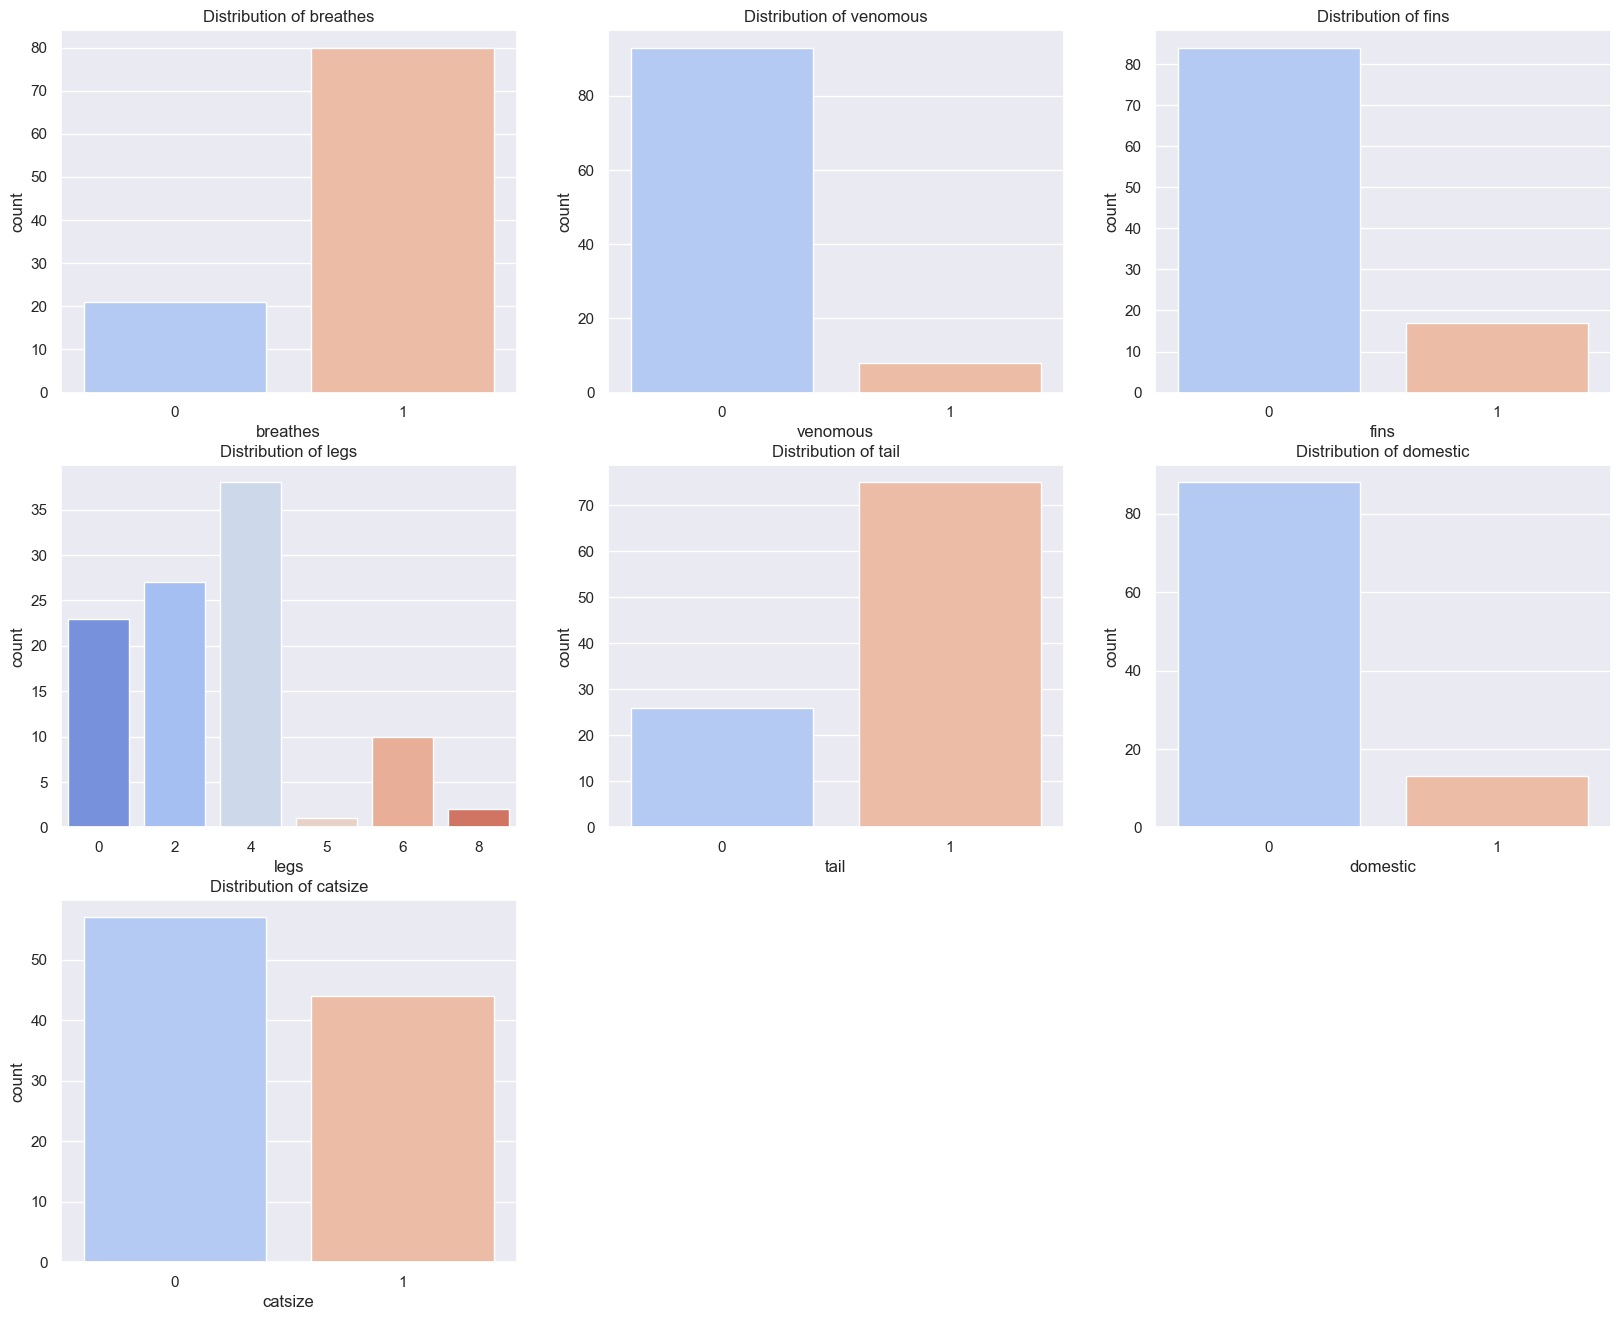

In [41]:
plt.figure(figsize=(20,16))
Cat_cols = ['breathes','venomous','fins','legs','tail','domestic','catsize']
for i,column in enumerate( Cat_cols,1):
    plt.subplot(3,3,i)
    sns.countplot(x = column, data = df,palette='coolwarm')
    plt.title(f'Distribution of {column}')

# Outliers

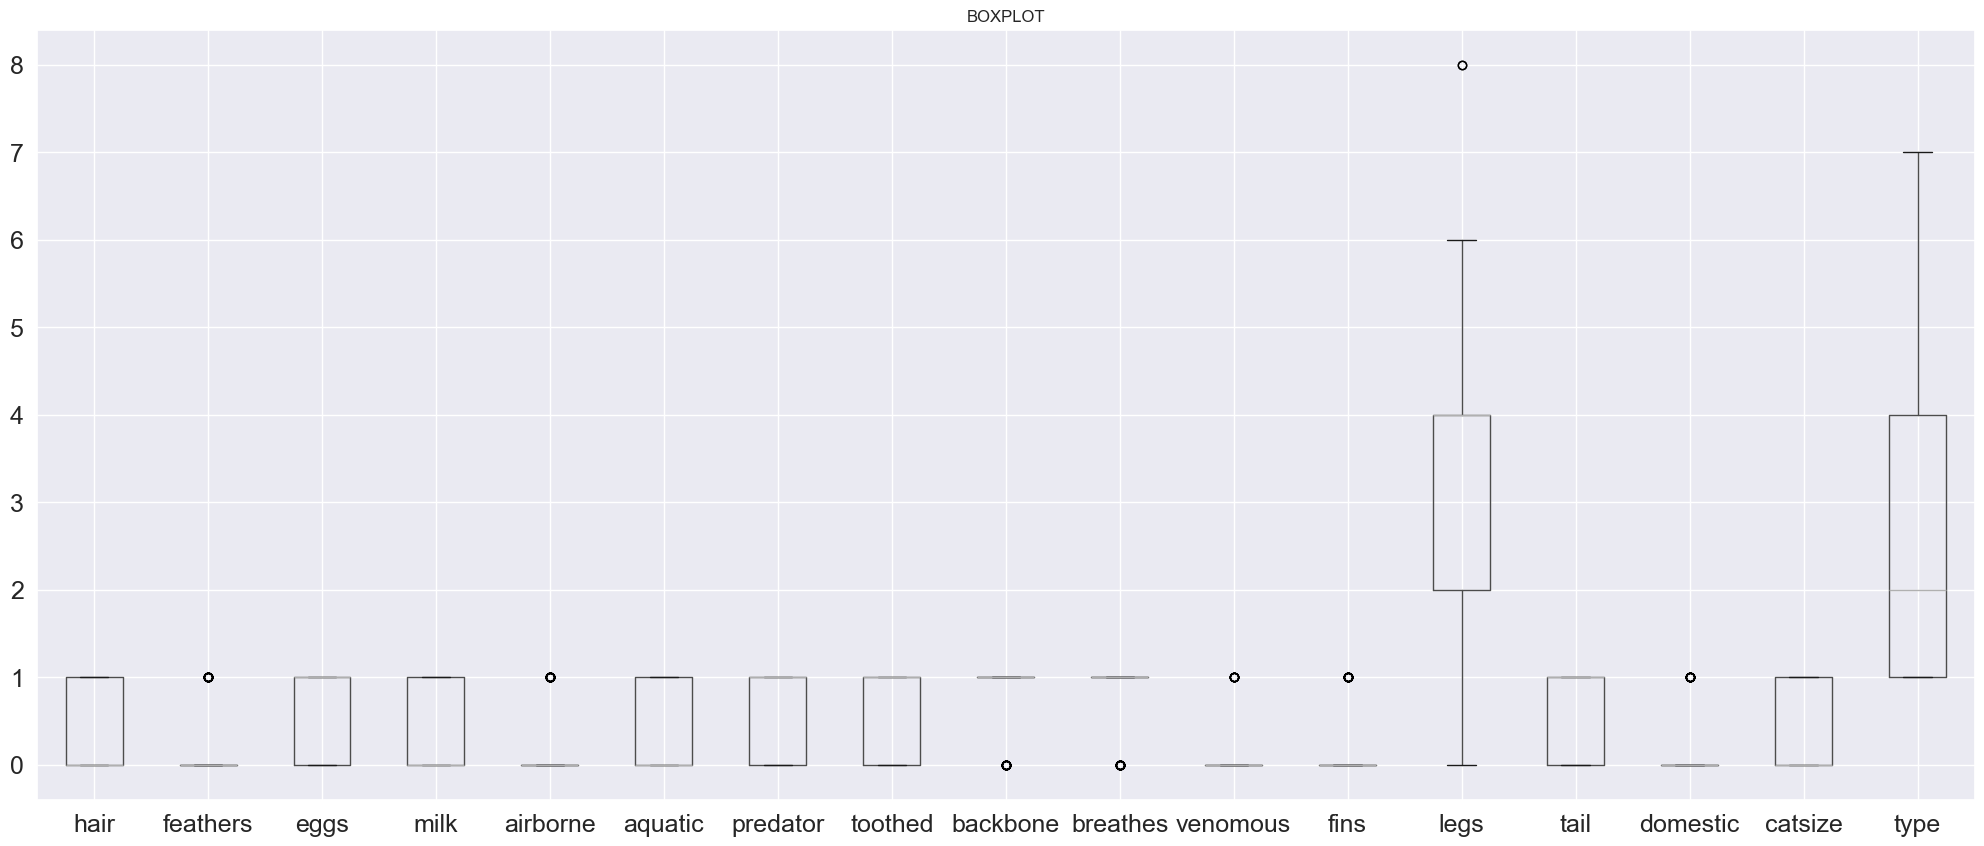

In [77]:
plt.figure(figsize=(25,10))
df.boxplot(column=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic',
                  'catsize','type'],fontsize=18)
plt.title('BOXPLOT')
plt.show()

# Coorelation Metrics

In [79]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


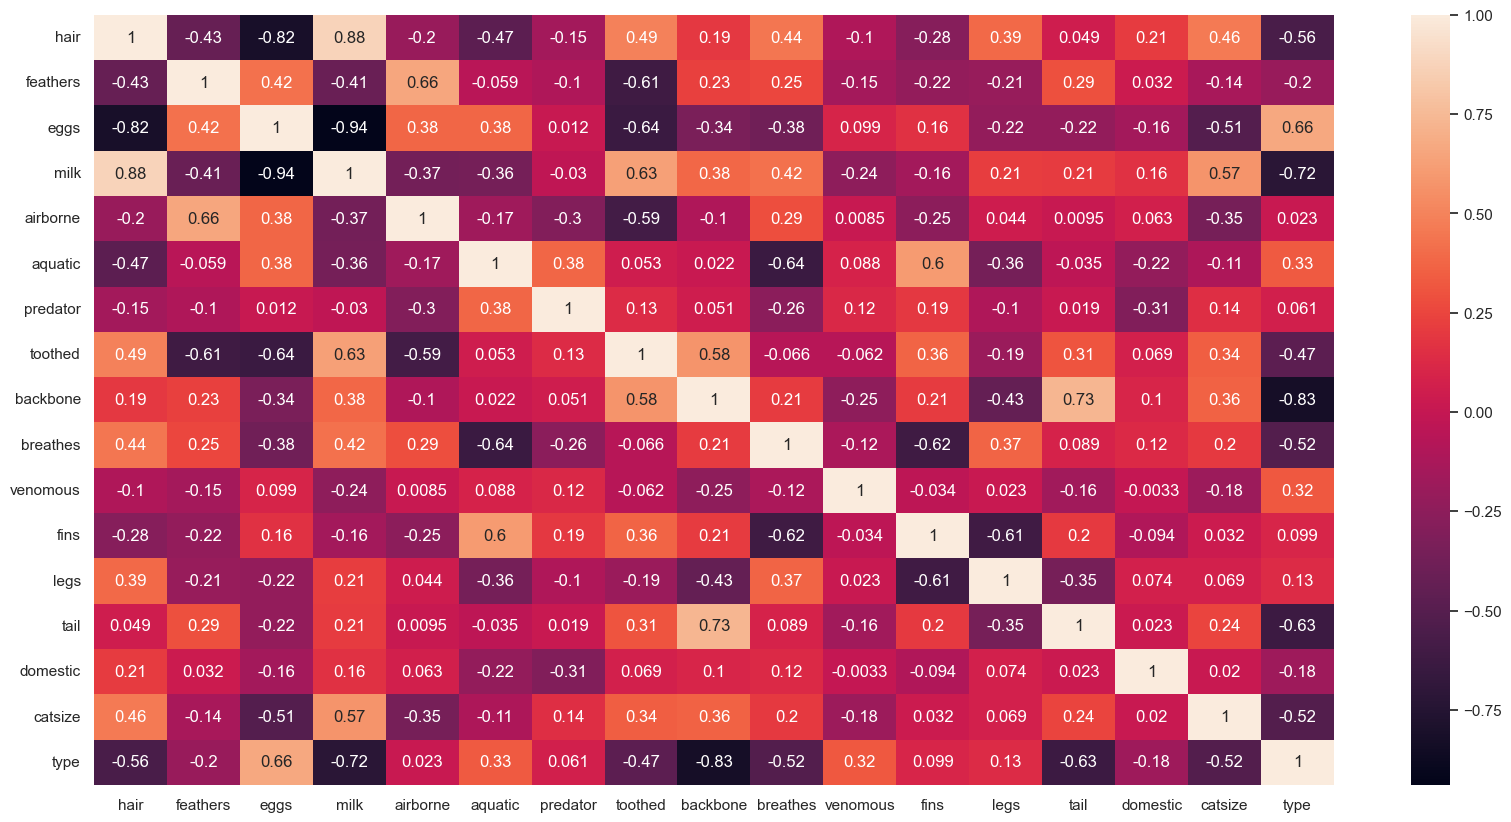

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Model Building

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [84]:
x = df.iloc[:,:-1]

In [87]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [88]:
y = df['type']

In [90]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [94]:
len(x_train),len(x_test),len(y_test),len(y_train)

(67, 34, 34, 67)

In [114]:
KNN = KNeighborsClassifier(n_neighbors=3,metric='euclidean',)

In [115]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [116]:
Train_pred = KNN.predict(x_train)

In [117]:
Test_pred = KNN.predict(x_test)

## Evaluation 

In [118]:
print('Train_Accuracy:-')
print(classification_report(y_train,Train_pred))

Train_Accuracy:-
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        17
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         7

    accuracy                           0.99        67
   macro avg       0.99      0.95      0.97        67
weighted avg       0.99      0.99      0.98        67



In [119]:
print('Test_Accuracy:-')
print(classification_report(y_test,Test_pred))

Test_Accuracy:-
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.91        34
   macro avg       0.74      0.81      0.76        34
weighted avg       0.88      0.91      0.89        34



## Visualization the decision boundaries of the classifier

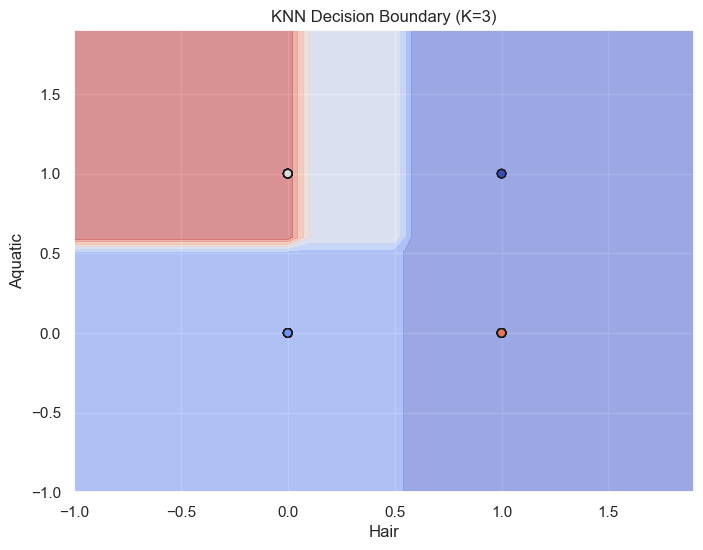

In [122]:
# Select two features for visualization ('hair' and 'aquatic')
X_train_2d = x_train[['hair', 'aquatic']]
X_test_2d = x_test[['hair', 'aquatic']]

# Train KNN on the two selected features
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_2d['hair'].min() - 1, X_train_2d['hair'].max() + 1
y_min, y_max = X_train_2d['aquatic'].min() - 1, X_train_2d['aquatic'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class labels for each point in the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(X_train_2d['hair'], X_train_2d['aquatic'], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('KNN Decision Boundary (K=3)')
plt.xlabel('Hair')
plt.ylabel('Aquatic')
plt.show()


## Interview Questions

1. What are the key hyperparameters in KNN?

Answer:-
       The key hyperparameters in the K-Nearest Neighbors (KNN) algorithm are as follows:
   1. Number of Neighbors (K)
   2. Distance Metric
   3. Weighting Function (Weights)
   4. Algorithm
   5. Metric Parameters
   6. P (for Minkowski Distance)

2. What distance metrics can be used in KNN?

Answer:- In K-Nearest Neighbors (KNN), the choice of distance metric is crucial as it defines how the similarity (or difference) between data points is measured. Several distance metrics can be used depending on the nature of the data. Here are the most commonly used ones:
1. Euclidean Distance
2. Manhattan Distance
3. Minkowski Distance